In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg

## Аппроксимация данных методом наименьших квадратов

Задача *аппроксимации* похожа на задачу интерполяции. Имеются некоторые точки и мы хотим найти функцию, график которой проходит через эти точки. Главное отличие от интерполяции в том, что график не обязательно точно проходит через эти точки, а может немного отклоняться от них, однако в целом функция правильно описывает тренд в данных.

Пусть, например, у нас есть такие точки:

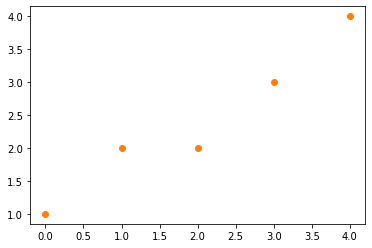

In [2]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 2, 3, 4])
plt.plot(x, y, 'o', color='tab:orange')
pass

Точки лежат вдоль некоторой прямой. Например, такой
(пока вы можете не обращать внимание на то, как мы ее построили):

In [3]:
m = len(x)
X = np.stack((np.ones(m), x)).T
beta, residuals, rank, sv = linalg.lstsq(X, y)

In [4]:
beta0, beta1 = beta
beta0, beta1

(0.9999999999999993, 0.7000000000000002)

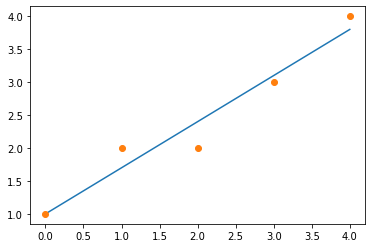

In [5]:
plt.plot(x, X@beta)
plt.plot(x, y, 'o')
pass

## 1. Простая линейная регрессия

Один из самых распространенных методов нахождения такой аппроксимирующей прямой - *метод наименьших квадратов* (МНК).
Итак, пусть имеются точки
$$
(x_1, y_1),\, (x_2, y_2),\, \dots,\, (x_m, y_m).
$$
Ищем линейную функцию (в математической статистике ее называют *простой линейной регрессией*)
$$
y = \beta_0 + \beta_1 x,
$$
такую, что
$$
y_i \approx \beta_0 + \beta_1 x_i
\qquad
(i=1,2,\dots, m).
$$
А именно, ищем $\beta_0$, $\beta_1$, на которых достигается минимум суммы квадратов невязок (*остаточной суммы квадратов*)
$$
R(\beta_0,\, \beta_1) = \sum_{i=1}^m \bigl(y_i - \beta_0 - \beta_1 x_i\bigr)^2 \to \min_{\beta_0,\, \beta_1} \tag{*}
$$
$R(\beta_0,\, \beta_1)$ - это сумма квадратов отклонений предсказанных значений $\beta_0 + \beta_1 x_i$ от истинных $y_i$. 

Чтобы найти миниимум $(*)$ возьмум частные производные по каждому неизвестному параметру $\beta_0$ и $\beta_1$ и приравняем их нулю:
$$
\frac{\partial R}{\partial \beta_0} = -2\sum_{i=1}^m \bigl(y_i - \beta_0 - \beta_1 x_i\bigr) = 0,
\qquad
\frac{\partial R}{\partial \beta_0} = -2\sum_{i=1}^m \bigl(y_i - \beta_0 - \beta_1 x_i\bigr) x_i = 0.
$$
После очевидных преобразований получаем
$$
\left\{
\begin{array}{l}
        \beta_0 m \hskip{.8cm}   + \beta_1 \sum\limits_{i=1}^m   x_i  \hskip{.44cm} = \sum\limits_{i=1}^m y_i, \\
 \beta_0 \sum\limits_{i=1}^m x_i + \beta_1 \sum\limits_{i=1}^m x_i^2 = \sum\limits_{i=1}^m x_iy_i. \\
\end{array} 
\right.  \tag{**}
$$
Получили систему линейных уравнений относительно неизвестных $\beta_0$, $\beta_1$.
Она называется *системой нормальных уравнений*.
Можно доказать, что решение этой системы доставляет минимум функции ($*$) (для этого надо проверить вторые производные, но мы не будем этим сейчас заниматься).

**Пример.** Пусть имеются точки $(x_i, y_i)$ $(i=1,2,\dots,m)$, $m=5$,
$$
\begin{array}{|c|c|c|c|}
\hline
x_i & 0 & 1 & 2 & 3 & 4 \\
\hline                  
y_i & 1 & 2 & 2 & 3 & 4 \\
\hline
\end{array}
$$
Находим $\sum\limits_{i=1}^5 x_i = 10$, $\sum\limits_{i=1}^5 x_i^2 = 30$, $\sum\limits_{i=1}^5 y_i = 12$, 
$\sum\limits_{i=1}^5 x_iy_i = 31$. Система ($**$) приобретает вид
$$
\left\{
\begin{array}{r}
       5 \beta_0 + 10 \beta_1 = 12, \\
      10 \beta_0 + 30 \beta_1 = 31.
\end{array}      
\right.      
$$
Находим решение этой системы $\beta_0 = 1$, $\beta=0.7$.
Таким образом, уравнение искомой аппроксимирующей прямой - $y=1+0.7x$.
Именно она изображена на рисунке выше.

**Замечание.**
Если ввести матрицы
$$
X = 
\left(
\begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m \\
\end{array}
\right),
\qquad
y =
\left(
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_m \\
\end{array}
\right),
\qquad
\beta =
\left(
\begin{array}{c}
\beta_0 \\
\beta_1 \\
\end{array}
\right),
$$
тогда систему нормальных уравнений ($**$) можно записать как
$$
(X^{\rm T} X)\, \beta = X^{\rm T} y. \tag{***}
$$

В частности, для рассмотренного примера
$$
X^{\rm T} X =
\left(
\begin{array}{ccccc}
  1 & 1 & 1 & 1 & 1 \\
  0 & 1 & 2 & 3 & 4
\end{array}
\right)
\cdot
\left(
\begin{array}{cc}
  1 & 0 \\
  1 & 1 \\
  1 & 2 \\
  1 & 3 \\
  1 & 4 \\
\end{array}
\right)
=
\left(
\begin{array}{cc}
  5 & 10 \\
 10 & 30 \\
\end{array}
\right),
\qquad
X^{\rm T} \beta =
\left(
\begin{array}{ccccc}
  1 & 1 & 1 & 1 & 1 \\
  0 & 1 & 2 & 3 & 4
\end{array}
\right)
\cdot
\left(
\begin{array}{c}
  1 \\
  2 \\
  2 \\
  3 \\
  4 \\
\end{array}
\right)
=
\left(
\begin{array}{c}
  12 \\
  31 \\
\end{array}
\right).
$$

Давайте все это опробуем в Питоне. Напрямую будем вычислять матрицы $X^{\rm T} X$, $X^{\rm T} y$.
А для решения системы ($***$) воспользуемся функцией `linalg.solve`. 
На практике мы рекомендуем пользоваться функцией `linalg.lstsq`, описанной ниже.

In [6]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 2, 3, 4])

n = len(x)
X = np.stack((np.ones(n), x)).T
beta = np.linalg.solve(X.T@X, X.T@y)
beta0, beta1 = beta
beta0, beta1

(1.0000000000000002, 0.7)

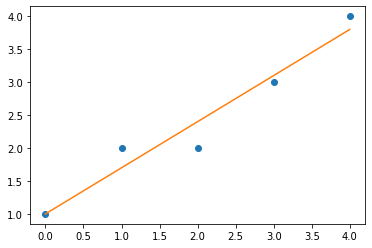

In [7]:
plt.plot(x, y, 'o')
plt.plot(x, X@beta)
pass

## 2. МНК в общей постановке

В более общей постановке задачи аппроксимации предполагают, что данные 
$$
(x_1, y_1),\, (x_2, y_2),\, \dots,\, (x_m, y_m)
$$
удовлетворяют соотношению
$$
y_i = f(x_i) + \mbox{ошибка} \qquad (i=1,2,\dots,m),
$$
где $f(x)$ - некоторая функция, называемая *модельной функцией* или *моделью*.
Иными словами,
$$
y_i \approx f(x_i) \qquad (i=1,2,\dots,m). \tag{+}
$$

Часто модель ищут в виде 
$$
f(x) = \beta_1 f_1(x) + \beta_2 f_2(x) + \dots + \beta_n f_n(x), \tag{++}
$$
где $f_1(x),f_2(x),\dots,f_n(x)$ - некоторые заданные функции.
Например, при аппроксимации данных линейной функцией (как было выше) $f_1(x) = 1$, $f_2(x)=x$. 
В более общем случае рассматривают аппроксимацию полиномами (многочленами), тогда
$f_1(x) = 1,\, f_2(x)=x\, \dots,\, f_n(x)=x^{n-1}$.

Есть разные подходы, как понимать приближенное равенство в ($+$).
Наиболее популярный подход - *метод наименьших квадратов*, когда ищут значения параметров $\beta_1, \dots, \beta_n$,
на которых достигается минимум
$$
 \sum_{i=1}^m \left(\beta_1 f_1(x_i) + \dots + \beta_n f_n(x_i) - y_i \strut\right)^2 \to \min_{\beta_1, \dots, \beta_n}. \tag{+++}
$$
При этом
$$
{\rm MSE} = \frac{1}{m}\sum_{i=1}^m \left(\beta_1 f_1(x_i) + \dots + \beta_n f_n(x_i) - y_i \strut\right)^2
$$
называют *средним квадратом ошибки* (*mean squared error*).

Так как параметры $\beta_1, \dots, \beta_n$ в ($++$) входят в модель линейно, то метод называется *линейным* методом наименьших квадратов (при этом функции $f_1(x),f_2(x),\dots,f_n(x)$ не обязаны быть линейными).

Заметим, что $x$ не обязан быть скаляром, а может быть вектором.


## 3. МНК на матричном языке

Очень удобно задачу наименьших квадратов исследовать, используя матричные обозначения.
Введем матрицы 
$$
X = 
\left(
\begin{array}{cc}
f_1(x_1) & f_2(x_1) & \dots & f_n(x_1) \\
f_1(x_2) & f_2(x_2) & \dots & f_n(x_2) \\
\dots \\
f_1(x_m) & f_2(x_m) & \dots & f_n(x_m) \\
\end{array}
\right),
\qquad
y =
\left(
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_m \\
\end{array}
\right),
\qquad
\beta =
\left(
\begin{array}{c}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n
\end{array}
\right).
$$

Обратите внимание, что все элементы в $X$ и $y$ известны, а коэффициенты в $\beta$ пока нет.

Формулы $(+)$ тогда можно записать как
$$
X\beta \approx y
$$
а задачу минимизации $(+++)$ - следующим образом:
$$
\|X\beta - y\|_2^2 \to \min_{\beta}.
$$
Заметим, что минимум нормы $\|X\beta - y\|_2$ совпадает с минимумом ее квадрата $\|X\beta - y\|_2^2$ (так как квадрат - функция монотонная для неотрицательного аргумента), но с $\|X\beta - y\|_2^2$ работать проще, так как здесь отсутствуют радикалы.

Обратите внимание, что равенство $X\beta \approx y$ означает, что мы желаем приближенно представить столбец $y$ в виде линейной комбинации столбцов матрицы $X$. Требование $\|X\beta - y\|_2 \to \min_{\beta}$ специфицирует, *что конкретно* означает здесь это *приближение* - минимизацию евклидовой нормы невязки $X\beta - y$.

Если бы систему $X\beta = y$ удавалось решить точно, то норма невязки равнялась бы нулю.
В этом случае график модельной зависимости проходил бы точно через заданные точки.
Однако, как правило, при аппроксимации данных получаемая с.л.у. $X\beta = y$ переопределена, т.е. не имеет решений.
Вектор $\beta$, на котором минимизируется евклидова норма  $\|X\beta - y\|_2$ называется *псевдорешением* системы $X\beta = y$.
Итак, решение линейной задачи наименьших квадратов есть псевдорешение системы $X\beta = y$.

Для нахождения решения задачи наименьших квадратов можно также найти все частные производные по каждому неизвестному параметру $\beta_1, \beta_2, \dots, \beta_n$ и приравнять их к нулю, как мы это делали для частного случая. Оказывается, мы придем к *системе нормальных уравнений* того же вида ($**$)
$$
(X^{\rm T} X)\, \beta = X^{\rm T} y. \tag{**}
$$
Псевдорешение системы $X\beta = y$ есть решение системы нормальных уравнений.

Итак, решение линейной задачи наименьших квадратов сводится к решение системы нормальных линейных уравнений.

**Замечание 1.** При решении больших задач обычно явно не вычилсяют матрицу $X^{\rm T} X$ (она может оказаться плохо обусловленной), а используют более продвинутые методы решения линейной задачи наименьших квадратов, например, использующие 
$QR$-разложение, сингулярное разложение и др.

**Замечание 2.** Вместо минимизации евклидовой нормы (т.е. вместо минимизации суммы квадратов) мы могли бы минимизировать другую норму, например, чебышевскую (минимизировать максимальную ошибку) или манхеттеновскую (минимизировать сумму модулей ошибок). В некоторых практических приложениях такие постановки задачи аппроксимации более естественны. Однако евклидову норму минимизировать проще. Все сводится к решению системы нормальных уравнений. Для минимизации других норм используют более сложные методы (методы оптимизации).

**Замечание 3.** Часто встречаются задачи аппроксимации, в которых неизвестные параметры входят нелинейным образом. Например, по данным мы ищем зависимость вида
$$
f(x) = \beta_1 e^{\lambda_1 x} + \beta_2 e^{\lambda_2 x}.
$$
Если $\lambda_1$, $\lambda_2$ известны, а требуется найти $\beta_1$, $\beta_2$, то это *линейная задача* наименьших квадратов.
Если же требуется найти $\lambda_1$, $\lambda_2$, то это *нелинейная задача* наименьших квадратов. Для решения нелинейных задач наименьших квадратов используют более сложные методы (методы оптимизации).


 ## 4. Функция `linalg.lstsq()`
 Линейную задачу наименьших квадратов решает функция `linalg.lstsq(X, y)`.
 Вернемся к нашему модельному примеру.

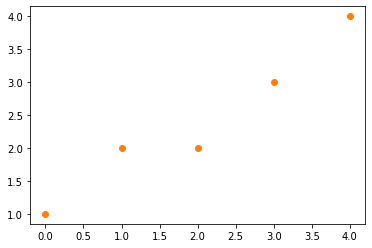

In [8]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2, 2, 3, 4])
plt.plot(x, y, 'o', color='tab:orange')
pass

Формируем матрицу `X` и обращаемся к функции `linalg.lstsq(X, y)`:

In [9]:
m = len(x)
X = np.stack((np.ones(m), x)).T
beta, residuals, rank, sv = linalg.lstsq(X, y)

`lstsq()` возвращает коэффициенты `beta`, сумму квадратов `residuals`, ранг `rank` матрицы `X` и ее сингулярные числа `sv`

In [10]:
beta0, beta1 = beta
beta0, beta1

(0.9999999999999993, 0.7000000000000002)

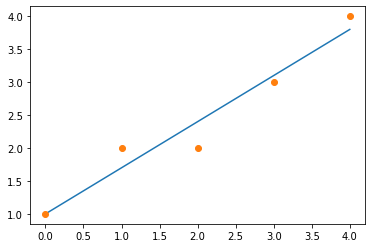

In [11]:
plt.plot(x, X@beta)
plt.plot(x, y, 'o')
pass

Сумма квадратов отклонений равна

In [12]:
residuals

0.29999999999999954

Проверим это:

In [13]:
linalg.norm(X@beta - y)**2

0.2999999999999998

## 5. Функция `polyfit()`

Для аппроксимации данных полиномами можно воспользоваться функцией `polyfit(x,y,n)`. Здесь `n` - степень искомого многочлена. Коэффициенты многочлена возвращаются в массиве в порядке убывания степеней.

In [14]:
np.polyfit(x, y, 1)

array([0.7, 1. ])

## 6. Еще один простой пример

Давайте аппроксимируем данные, сгенерированные вручную.
Точки будут лежать вдоль параболы.
Запишем сами функцию и добавим к координате $y$ небольшую ошибку (распределенную по нормальному закону.

In [15]:
def my_quadratic_function(x):
    return x**2 - 0.6*x + 1

Парабола:

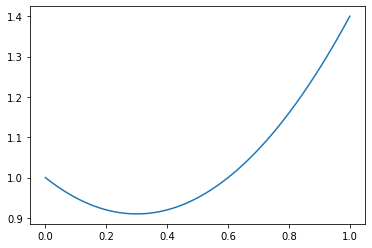

In [16]:
xx = np.linspace(0, 1, 500)
plt.plot(xx, my_quadratic_function(xx))
pass

А теперь сгенерируем данные:

In [17]:
np.random.seed(42)
m = 20
x = np.random.rand(m)
y = my_quadratic_function(x) + 0.05*np.random.randn(m)

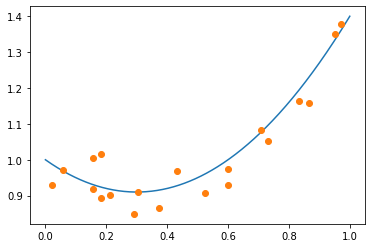

In [18]:
xx = np.linspace(0, 1, 500)
plt.plot(xx, my_quadratic_function(xx))
plt.plot(x, y, 'o')
pass

Насколько точно мы сможем восстановить параболу по точкам?  

Попробуем оба метода: `lstsq()` и `polyfit()`

In [19]:
X = np.stack((np.ones(m), x, x**2)).T
beta, _, _, _ = linalg.lstsq(X, y)

In [20]:
beta0, beta1, beta2 = beta
beta

array([ 1.01701246, -0.74509807,  1.11942245])

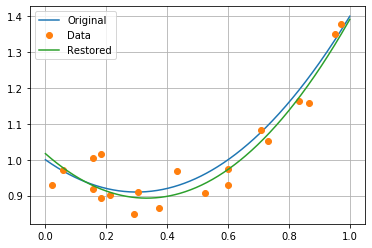

In [21]:
xx = np.linspace(0, 1, 500)
plt.plot(xx, my_quadratic_function(xx), label = 'Original')
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xx, beta0 + beta1*xx + beta2*xx**2, label = 'Restored')
plt.legend()
plt.grid()
pass

То же самое можно проделать, используя функцию `polyfit()`:

In [22]:
beta = np.polyfit(x, y, 2)
beta

array([ 1.11942245, -0.74509807,  1.01701246])

Получили те же коэффициенты.

## Выводы

1. Линейная задача наименьших квадратов - это задача поиска коэффициентов $\beta_1,\dots,\beta_n$, доставляющих минимум функции
$$
 \sum_{i=1}^m \left(\beta_1 f_1(x_i) + \dots + \beta_n f_n(x_i) - y_i \strut\right)^2 \to \min_{\beta_1, \dots, \beta_n},
$$
где $(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)$ - данные, а $f_1(x), f_2(x), \dots, f_n(x)$ - известные функции.

2. Линейная задача наименьших квадратов может быть сформулирована как задача поиска псевдорешения системы $X\beta = y$, т.е. поиска вектора $\beta$, минимизирующего евклидову норму невязки.

3. Решение линейной задачи наименьших квадратов $X\beta \approx y$ сводится к решению системы нормальных линейных уравнений
$X^{\rm T} X \beta = X^{\rm T} y$.

